## Import Libraries & Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
gerard = pd.read_csv("data/gerardtieng_2019_1.csv")

In [3]:
gerard.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1091095912330551297,https://twitter.com/gerardtieng/status/1091095...,@JonathanBice77 https://t.co/wXF61ipAc5,2019-01-31 22:08 +0000,312.0,1.0,0.003205,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
1,1091057556506722305,https://twitter.com/gerardtieng/status/1091057...,Nobody asked for Cool Ranch Doritos like nobod...,2019-01-31 19:36 +0000,547.0,7.0,0.012797,0.0,2.0,1.0,...,-,-,-,-,-,-,-,-,-,-
2,1091026622105509888,https://twitter.com/gerardtieng/status/1091026...,@LAValiant @SeoulDynasty @Spitfire 👁👁,2019-01-31 17:33 +0000,140.0,0.0,0.000000,0.0,0.0,0.0,...,-,-,-,-,-,-,-,-,-,-
3,1090784520847220736,https://twitter.com/gerardtieng/status/1090784...,@jennbojones https://t.co/alE3oViCC1,2019-01-31 01:31 +0000,181.0,1.0,0.005525,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-
4,1090783481192501249,https://twitter.com/gerardtieng/status/1090783...,@jennbojones Welcome to #TeamSCUF.,2019-01-31 01:27 +0000,205.0,2.0,0.009756,0.0,1.0,0.0,...,-,-,-,-,-,-,-,-,-,-


In [6]:
for i in np.arange(2, 13):
    df = pd.read_csv("data/gerardtieng_2019_{}.csv".format(i))
    gerard = pd.concat([gerard, df])

In [10]:
gerard.shape

(2040, 40)

## Data Selection

In [16]:
gerard.columns

Index(['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements',
       'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements'],
      dtype='object')

In [20]:
gerard = gerard[["Tweet permalink", "Tweet text", "time", "impressions", "engagements", "retweets", "replies", "likes", "user profile clicks"]].copy()

In [21]:
gerard["time"] = pd.to_datetime(gerard["time"])

In [25]:
gerard["hour"] = gerard["time"].dt.hour
gerard["month"] = gerard["time"].dt.month
gerard["dayofweek"] = gerard["time"].dt.dayofweek

In [38]:
gerard_tweets = gerard[~gerard["Tweet text"].str.startswith("@")]
gerard_replies = gerard[gerard["Tweet text"].str.startswith("@")]

## Activity Summary

In [28]:
gerard.sum()

Tweet permalink        https://twitter.com/gerardtieng/status/1091095...
Tweet text             @JonathanBice77 https://t.co/wXF61ipAc5Nobody ...
impressions                                                       486768
engagements                                                        13351
retweets                                                             105
replies                                                              903
likes                                                               2927
user profile clicks                                                  993
hour                                                               23645
month                                                              13154
dayofweek                                                           6338
dtype: object

In [41]:
gerard_tweets.sort_values("impressions", ascending=False).head(10)

,Tweet permalink,Tweet text,time,impressions,engagements,retweets,replies,likes,user profile clicks,hour,month,dayofweek
81,https://twitter.com/gerardtieng/status/1151500...,"If you’re not @Brandwatch Influitiving, you’re...",2019-07-17 14:33:00+00:00,23875.0,20.0,1.0,1.0,0.0,8.0,14,7,2
56,https://twitter.com/gerardtieng/status/1096890...,#WeekendReads: The new brand follower report f...,2019-02-16 21:52:00+00:00,4964.0,13.0,1.0,0.0,1.0,5.0,21,2,5
188,https://twitter.com/gerardtieng/status/1139688...,This robot is about to drop the Razor’s Edge o...,2019-06-15 00:19:00+00:00,4643.0,372.0,8.0,4.0,45.0,22.0,0,6,5
2,https://twitter.com/gerardtieng/status/1123249...,If #SonicMovie becomes the #AceVentura Threequ...,2019-04-30 15:34:00+00:00,3447.0,42.0,0.0,0.0,14.0,0.0,15,4,1
120,https://twitter.com/gerardtieng/status/1093522...,Vital knowledge for 2019 from our friends at @...,2019-02-07 14:50:00+00:00,2834.0,20.0,1.0,1.0,1.0,2.0,14,2,3
30,https://twitter.com/gerardtieng/status/1133502...,Bro...how could you leave out Phreak? https://...,2019-05-28 22:38:00+00:00,2621.0,5.0,0.0,1.0,1.0,0.0,22,5,1
48,https://twitter.com/gerardtieng/status/1143607...,Sup nerds https://t.co/IDzjyKqRjv,2019-06-25 19:49:00+00:00,2594.0,90.0,0.0,1.0,13.0,4.0,19,6,1
94,https://twitter.com/gerardtieng/status/1080020...,💍✔️,2019-01-01 08:40:00+00:00,2342.0,129.0,0.0,12.0,22.0,51.0,8,1,1
56,https://twitter.com/gerardtieng/status/1132024...,Any time I get one RT: https://t.co/mwoNpbYV0e,2019-05-24 20:46:00+00:00,2121.0,128.0,7.0,0.0,10.0,0.0,20,5,4
216,https://twitter.com/gerardtieng/status/1146835...,This is your obligatory California “did you fe...,2019-07-04 17:36:00+00:00,1891.0,27.0,0.0,4.0,17.0,4.0,17,7,3


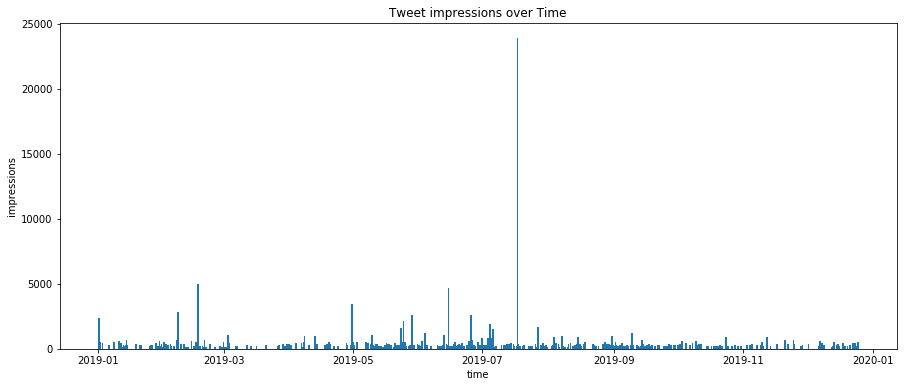

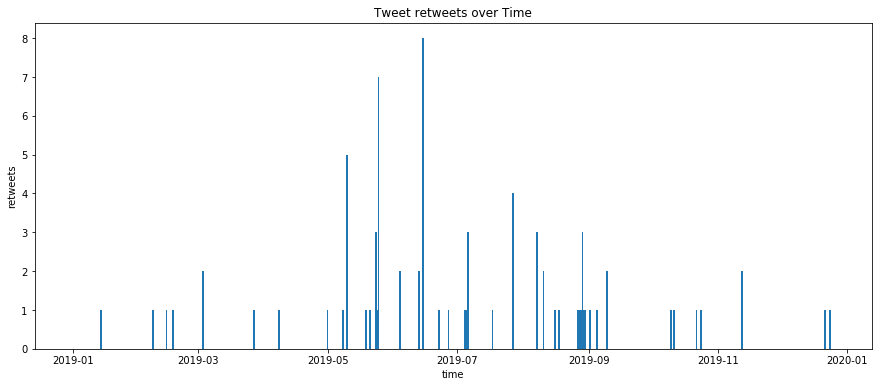

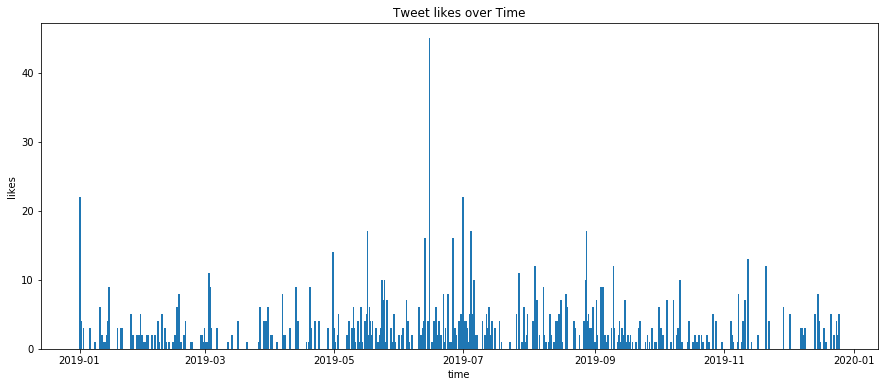

In [39]:
activity_columns = ["impressions", "retweets", "likes"]

for i in activity_columns:
    plt.figure(figsize=(15,6))
    plt.bar(gerard_tweets["time"], gerard_tweets[i])
    plt.xlabel("time")
    plt.ylabel(i)
    plt.title(f"Tweet {i} over Time")
    plt.show()